# 複素数変換の可視化: f(z) = z(z+1)

z = x + yi として、直交座標の格子が f(z) = z(z+1) によってどのように変換されるかを可視化します。

In [14]:
using CairoMakie
using LinearAlgebra

# Mac標準の日本語フォントを設定
set_theme!(fonts = (regular = "Hiragino Sans", bold = "Hiragino Sans"))

In [15]:
# 複素数変換関数
f(z) = z * (z + 1)

# 複素数を実部と虚部に分解
function complex_to_coords(z)
    return real(z), imag(z)
end

complex_to_coords (generic function with 1 method)

In [16]:
# 格子の範囲設定
x_range = -3:0.5:3
y_range = -3:0.5:3

# 変換前の格子データ生成
function create_grid_lines(x_range, y_range)
    vertical_lines = []
    horizontal_lines = []
    
    # 垂直線（x = 定数）
    for x in x_range
        line_x = Float64[]
        line_y = Float64[]
        for y in range(minimum(y_range), maximum(y_range), length=100)
            push!(line_x, x)
            push!(line_y, y)
        end
        push!(vertical_lines, (line_x, line_y))
    end
    
    # 水平線（y = 定数）
    for y in y_range
        line_x = Float64[]
        line_y = Float64[]
        for x in range(minimum(x_range), maximum(x_range), length=100)
            push!(line_x, x)
            push!(line_y, y)
        end
        push!(horizontal_lines, (line_x, line_y))
    end
    
    return vertical_lines, horizontal_lines
end

# 格子を変換
function transform_grid(vertical_lines, horizontal_lines, transform_func)
    transformed_vertical = []
    transformed_horizontal = []
    
    for (xs, ys) in vertical_lines
        new_xs = Float64[]
        new_ys = Float64[]
        for (x, y) in zip(xs, ys)
            z = complex(x, y)
            w = transform_func(z)
            push!(new_xs, real(w))
            push!(new_ys, imag(w))
        end
        push!(transformed_vertical, (new_xs, new_ys))
    end
    
    for (xs, ys) in horizontal_lines
        new_xs = Float64[]
        new_ys = Float64[]
        for (x, y) in zip(xs, ys)
            z = complex(x, y)
            w = transform_func(z)
            push!(new_xs, real(w))
            push!(new_ys, imag(w))
        end
        push!(transformed_horizontal, (new_xs, new_ys))
    end
    
    return transformed_vertical, transformed_horizontal
end

transform_grid (generic function with 1 method)

In [17]:
# 格子生成
vertical_lines, horizontal_lines = create_grid_lines(x_range, y_range)

# 変換適用
transformed_vertical, transformed_horizontal = transform_grid(vertical_lines, horizontal_lines, f)

(Any[([-3.0, -2.6400367309458215, -2.287419651056016, -1.9421487603305794, -1.604224058769515, -1.2736455463728182, -0.9504132231404956, -0.6345270890725434, -0.3259871441689626, -0.024793388429752206  …  -0.024793388429752206, -0.3259871441689626, -0.6345270890725434, -0.9504132231404956, -1.2736455463728182, -1.604224058769515, -1.9421487603305794, -2.287419651056016, -2.6400367309458215, -3.0], [15.0, 14.696969696969697, 14.393939393939394, 14.090909090909092, 13.787878787878789, 13.484848484848484, 13.18181818181818, 12.878787878787879, 12.575757575757574, 12.272727272727273  …  -12.272727272727273, -12.575757575757574, -12.878787878787879, -13.18181818181818, -13.484848484848484, -13.787878787878789, -14.090909090909092, -14.393939393939394, -14.696969696969697, -15.0]), ([-5.25, -4.8900367309458215, -4.537419651056016, -4.192148760330579, -3.854224058769515, -3.5236455463728182, -3.2004132231404956, -2.8845270890725434, -2.5759871441689626, -2.274793388429752  …  -2.2747933884297

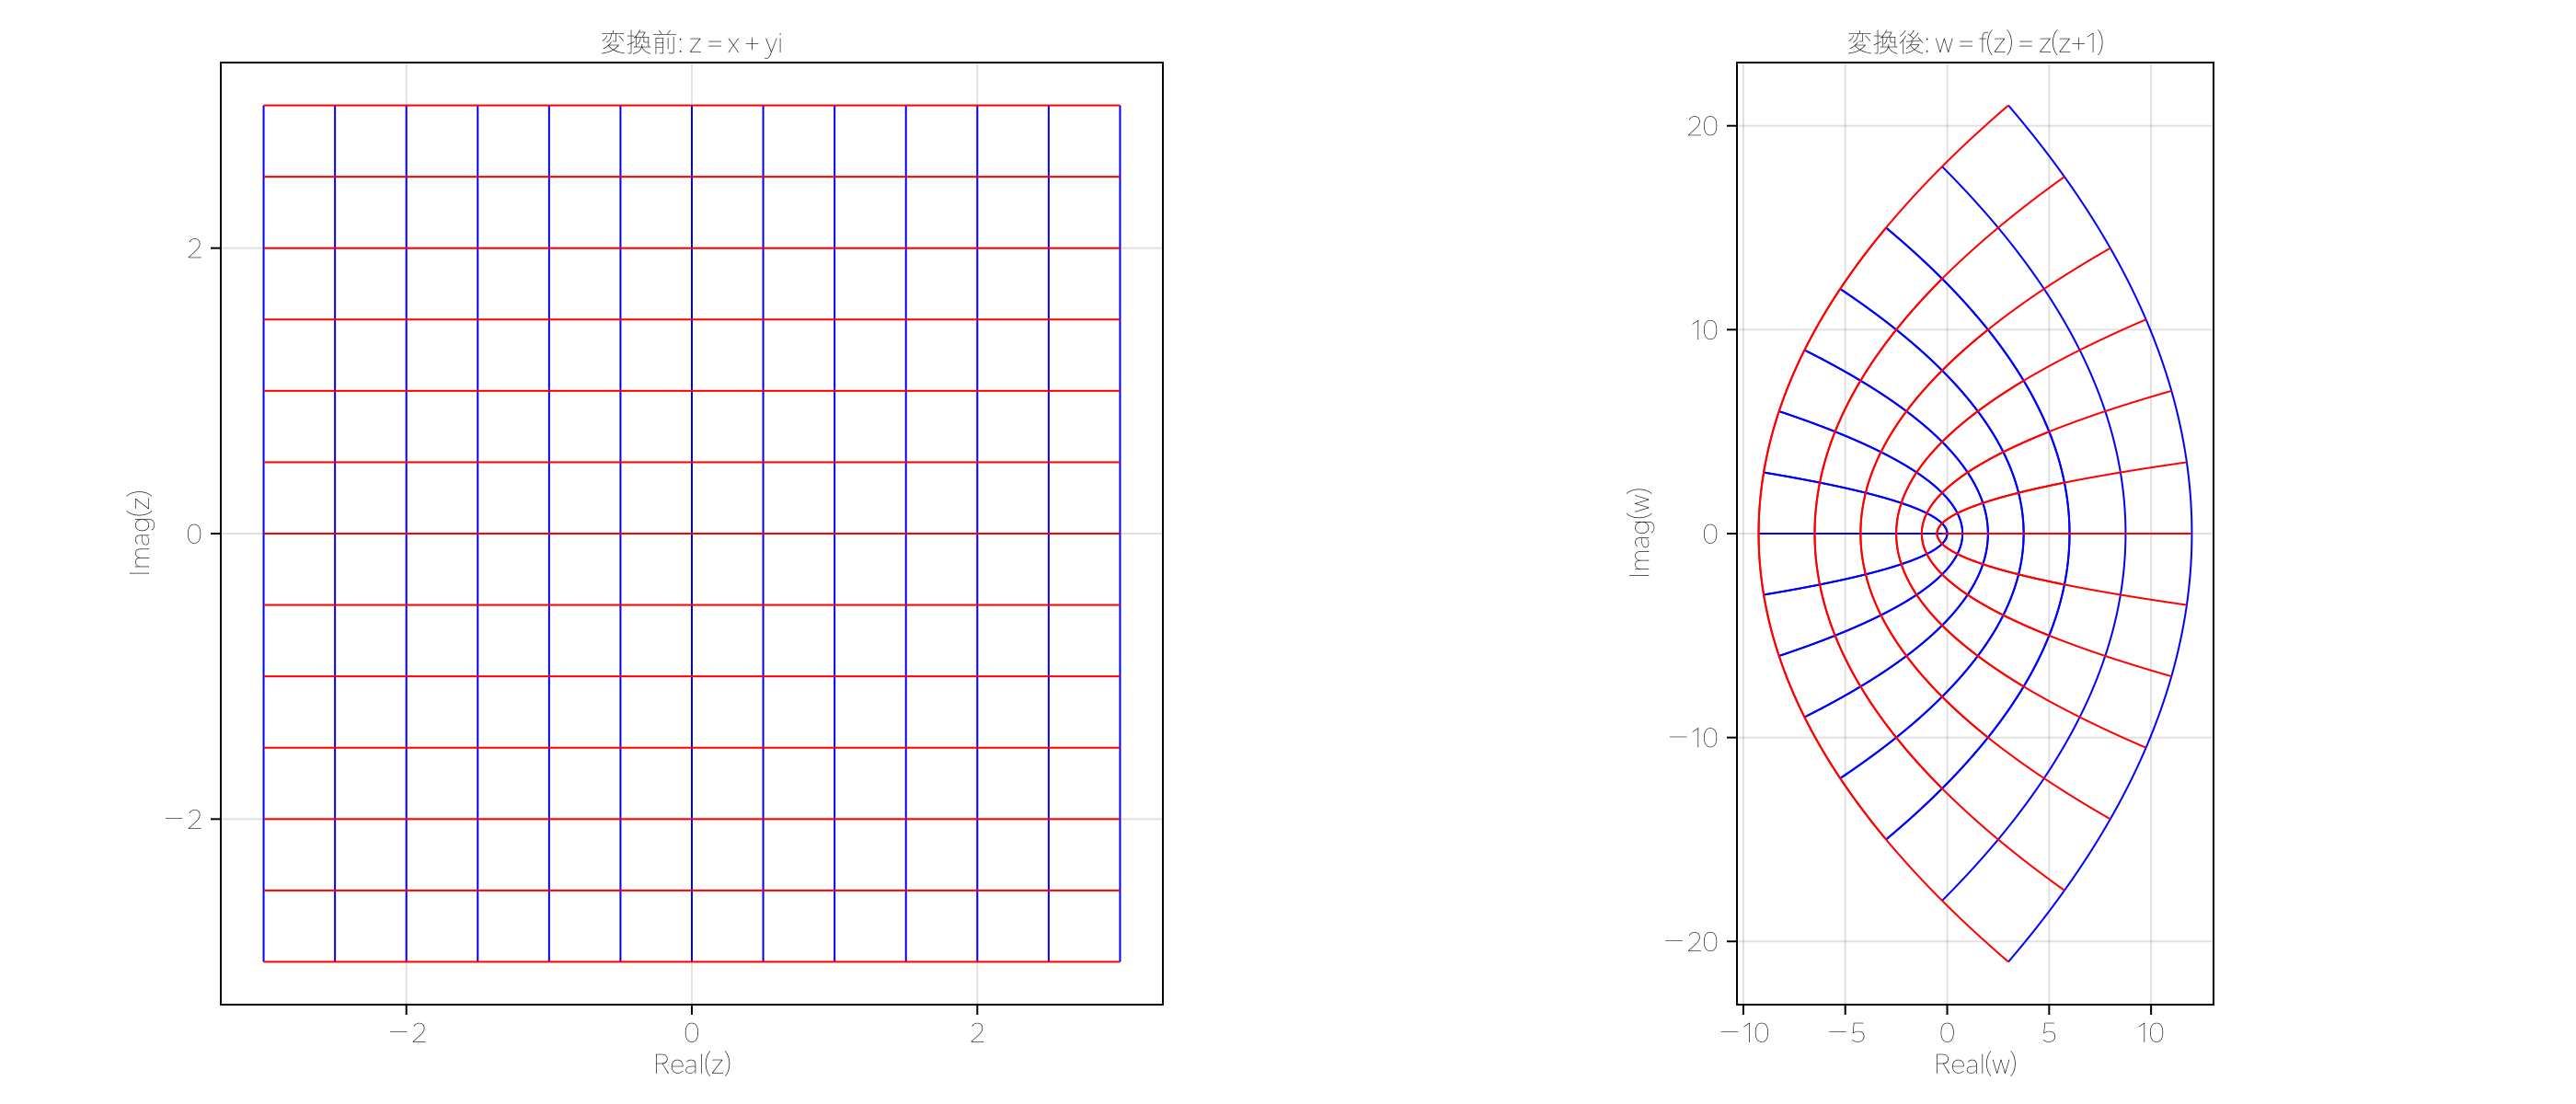

In [18]:
# プロット作成
fig = Figure(size=(1400, 600))

# 変換前の格子
ax1 = Axis(fig[1, 1], 
    title="変換前: z = x + yi",
    xlabel="Real(z)",
    ylabel="Imag(z)",
    aspect=DataAspect())

# 垂直線を描画
for (xs, ys) in vertical_lines
    lines!(ax1, xs, ys, color=:blue, linewidth=1)
end

# 水平線を描画
for (xs, ys) in horizontal_lines
    lines!(ax1, xs, ys, color=:red, linewidth=1)
end

# 変換後の格子
ax2 = Axis(fig[1, 2], 
    title="変換後: w = f(z) = z(z+1)",
    xlabel="Real(w)",
    ylabel="Imag(w)",
    aspect=DataAspect())

# 変換された垂直線を描画
for (xs, ys) in transformed_vertical
    lines!(ax2, xs, ys, color=:blue, linewidth=1)
end

# 変換された水平線を描画
for (xs, ys) in transformed_horizontal
    lines!(ax2, xs, ys, color=:red, linewidth=1)
end

fig

## 解説

- **青い線**: x = 定数 の垂直線
- **赤い線**: y = 定数 の水平線

変換 f(z) = z(z+1) = z² + z により、直交格子が曲線格子に変換されます。

展開すると:
- z = x + yi のとき
- f(z) = (x + yi)² + (x + yi)
- f(z) = (x² - y² + x) + i(2xy + y)

したがって:
- Real(w) = x² - y² + x
- Imag(w) = 2xy + y = y(2x + 1)

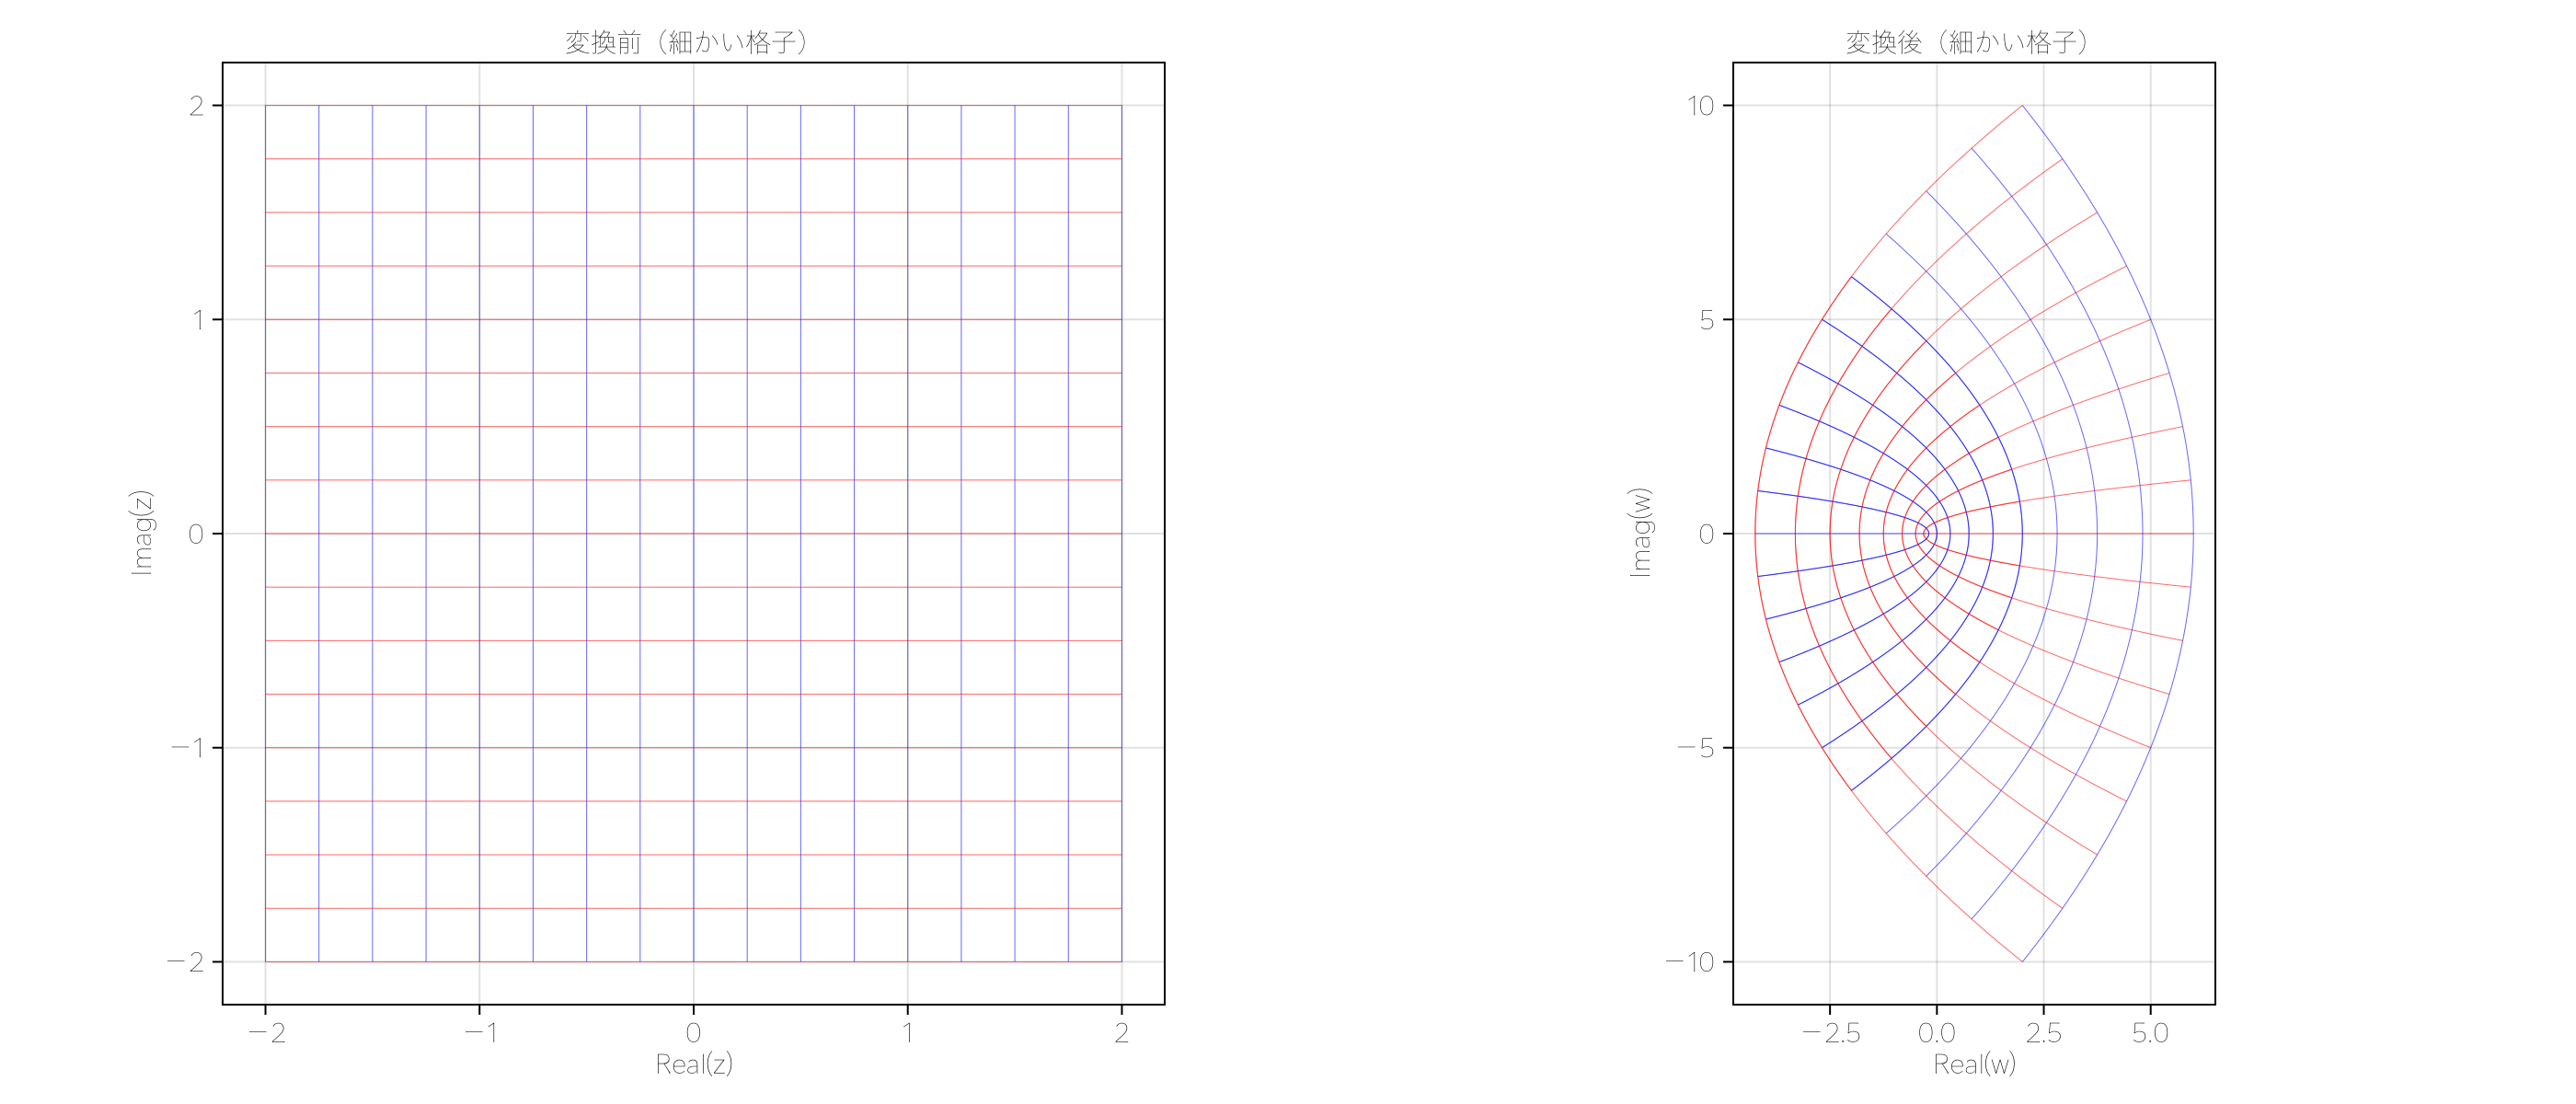

In [19]:
# より細かい格子での可視化（オプション）
x_range_fine = -2:0.25:2
y_range_fine = -2:0.25:2

vertical_lines_fine, horizontal_lines_fine = create_grid_lines(x_range_fine, y_range_fine)
transformed_vertical_fine, transformed_horizontal_fine = transform_grid(
    vertical_lines_fine, horizontal_lines_fine, f)

fig2 = Figure(size=(1400, 600))

ax3 = Axis(fig2[1, 1], 
    title="変換前（細かい格子）",
    xlabel="Real(z)",
    ylabel="Imag(z)",
    aspect=DataAspect())

for (xs, ys) in vertical_lines_fine
    lines!(ax3, xs, ys, color=(:blue, 0.6), linewidth=0.5)
end

for (xs, ys) in horizontal_lines_fine
    lines!(ax3, xs, ys, color=(:red, 0.6), linewidth=0.5)
end

ax4 = Axis(fig2[1, 2], 
    title="変換後（細かい格子）",
    xlabel="Real(w)",
    ylabel="Imag(w)",
    aspect=DataAspect())

for (xs, ys) in transformed_vertical_fine
    lines!(ax4, xs, ys, color=(:blue, 0.6), linewidth=0.5)
end

for (xs, ys) in transformed_horizontal_fine
    lines!(ax4, xs, ys, color=(:red, 0.6), linewidth=0.5)
end

fig2